# Load libraries and data

In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Optional: Make the output less wrapped
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
# Display up to 100 rows of data
pd.options.display.min_rows = 100

data = pd.read_csv('../data/Merged_Df_Cleaned_Enhanced 2.csv')

data.head()

,Show,Season,Episode,Time,Episode Length,IMDB Rating,Emmy Nominations,Emmy Wins,Air Date,SD_div_mean_2,SD_div_mean_3,SD_sum_1,SD_sum_2,SD_sum_3,SD_scaled_1,SD_scaled_2,SD_scaled_3,Anger_1,Anger_2,Anger_3,Surprise_1,Surprise_2,Surprise_3,Disgust_1,Disgust_2,Disgust_3,Sadness_1,Sadness_2,Sadness_3,Neutral_1,Neutral_2,Neutral_3,Fear_1,Fear_2,Fear_3,Joy_1,Joy_2,Joy_3,Positive_1,Positive_2,Positive_3,Negative_1,Negative_2,Negative_3,Engaged_1,Engaged_2,Engaged_3,Not engaged_1,Not engaged_2,Not engaged_3,WC_1,WC_2,WC_3,Analytic_1,Analytic_2,Analytic_3,Clout_1,Clout_2,Clout_3,Authentic_1,Authentic_2,Authentic_3,Tone_1,Tone_2,Tone_3,WPS_1,WPS_2,WPS_3,Sixltr_1,Sixltr_2,Sixltr_3,Dic_1,Dic_2,Dic_3,Cogproc_1,Cogproc_2,Cogproc_3,Insight_1,Insight_2,Insight_3,Cause_1,Cause_2,Cause_3,Discrep_1,Discrep_2,Discrep_3,Tentat_1,Tentat_2,Tentat_3,Certain_1,Certain_2,Certain_3,Differ_1,Differ_2,Differ_3,Percept_1,Percept_2,Percept_3,See_1,See_2,See_3,Hear_1,Hear_2,Hear_3,Feel_1,Feel_2,Feel_3,Drives_1,Drives_2,Drives_3,Affiliation_1,Affiliation_2,Affiliation_3,Achieve_1,Achieve_2,Achieve_3,Power_1,Power_2,Power_3,Reward_1,Reward_2,Reward_3,Risk_1,Risk_2,Risk_3,Relativ_1,Relativ_2,Relativ_3,Motion_1,Motion_2,Motion_3,Space_1,Space_2,Space_3,Time_1,Time_2,Time_3,Viewership (millions),Genre,No.of episodes,No.of seasons,Year,Network_ABC,Network_AMC,Network_Adult Swim,Network_BBC Two,Network_CBC Television,Network_CBS,Network_Cartoon Network,Network_Comedy Central,Network_Disney Channel,Network_FX,Network_First-run syndication,Network_Fox,Network_HBO,Network_HBO (US),Network_IFC,Network_NBC,Network_Paramount Network,Network_Showtime,Network_Starz,Network_The CW,Network_The WB,Network_USA Network,Cancelled
0,2 Broke Girls,1,1,9:30 PM,22,7.3,NaN,NaN,9/19/2011,9159.676336,4626.990287,18.665142,20.545673,21.697182,598.633647,655.592115,699.852149,0.152832,0.156812,0.142193,0.123419,0.304443,0.196933,0.294055,0.191260,0.178610,0.082955,0.133556,0.150450,0.275732,0.139736,0.201043,0.041943,0.057071,0.117933,0.029063,0.017123,0.012838,0.143283,0.286813,0.376216,0.856717,0.713187,0.623784,0.592052,0.714431,0.647553,0.407948,0.285569,0.352447,121.428571,122.142857,111.500,18.455714,25.675714,16.448750,67.277143,68.245714,75.648750,45.874286,57.218571,47.235000,56.377143,36.382857,39.815000,5.990000,5.978571,5.978750,13.158571,9.378571,10.813750,87.604286,90.330000,91.68125,11.522857,11.104286,13.167500,2.048571,2.377143,3.277500,1.805714,1.871429,0.908750,2.301429,1.547143,2.241250,1.694286,0.785714,2.213750,1.154286,1.621429,1.058750,3.288571,2.995714,4.426250,2.768571,3.610000,3.252500,1.427143,0.907143,0.877500,0.467143,0.930000,1.105000,0.782857,1.650000,1.182500,6.240000,7.365714,8.381250,2.732857,3.150000,3.603750,0.604286,0.817143,1.525000,1.272857,1.807143,1.770000,1.514286,1.307143,2.658750,0.604286,0.661429,0.212500,11.350000,12.421429,9.808750,1.734286,2.421429,2.072500,5.192857,7.394286,5.413750,4.322857,3.005714,2.572500,19.37,Sitcom,138,6,2011,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2 Broke Girls,1,2,8:30 PM,22,7.1,NaN,NaN,9/26/2011,3451.804293,7127.226694,19.733889,20.345823,17.440190,629.842904,653.873106,559.928630,0.106155,0.125676,0.156319,0.120013,0.089329,0.185747,0.140081,0.265370,0.158996,0.048607,0.141461,0.100636,0.310454,0.313998,0.238105,0.243629,0.027885,0.143920,0.031060,0.036280,0.016276,0.561609,0.425518,0.283327,0.438391,0.574482,0.716673,0.732341,0.539602,0.626455,0.267659,0.460398,0.373545,140.428571,128.571429,133.000,27.622857,33.668571,14.271429,60.957143,69.014286,78.857143,66.600000,59.651429,56.551429,49.485714,77.711429,52.707143,6.348571,5.442857,5.830000,13.621429,8.921429,11.192857,89.078571,89.220000,91.08000,11.828571,7.108571,10.860000,2.597143,1.171429,2.632857,1.374286,0.642857,0.934286,2.078571,1.687143,1.304286,2.594286,1.722857,2.108571,1.401429,0.972857,1.688571,2.680000,2.015714,3.001429,2.417143,3.417143,2.125714,0.534286,1.155714,0.332857,1.032857,1.290000,1.135714,0.415714,0.840000,0.577143,7.690000,

In [33]:
# Add an average metric of emotional scores (one per act instead of three)
new_data = data.copy()

# Rename Time column so it is not averaged into Time_ emotional scores
new_data = new_data.rename(columns={'Time': 'emission_time'})

for col in new_data.columns.to_list()[9:136]:
    col_prefix = col[:-2]
    new_column_name = "avg_" + col_prefix
    if new_column_name not in new_data.columns.to_list():    
        cols_to_avg = [col for col in new_data.columns.to_list() if col_prefix in col]
        new_data[new_column_name] = new_data[cols_to_avg].mean(axis = 1)

In [34]:
# Display new columns
new_data.iloc[:,165:].head()

,avg_SD_div_mean,avg_SD_sum,avg_SD_scaled,avg_Anger,avg_Surprise,avg_Disgust,avg_Sadness,avg_Neutral,avg_Fear,avg_Joy,avg_Positive,avg_Negative,avg_Engaged,avg_Not engaged,avg_WC,avg_Analytic,avg_Clout,avg_Authentic,avg_Tone,avg_WPS,avg_Sixltr,avg_Dic,avg_Cogproc,avg_Insight,avg_Cause,avg_Discrep,avg_Tentat,avg_Certain,avg_Differ,avg_Percept,avg_See,avg_Hear,avg_Feel,avg_Drives,avg_Affiliation,avg_Achieve,avg_Power,avg_Reward,avg_Risk,avg_Relativ,avg_Motion,avg_Space,avg_Time
0,6893.333312,20.302666,651.359304,0.150612,0.208265,0.221308,0.122320,0.205504,0.072316,0.019675,0.268770,0.731230,0.651345,0.348655,118.357143,20.193393,70.390536,50.109286,44.191667,5.982440,11.116964,89.871845,11.931548,2.567738,1.528631,2.029940,1.564583,1.278155,3.570179,3.210357,1.070595,0.834048,1.205119,7.328988,3.162202,0.982143,1.616667,1.826726,0.492738,11.193393,2.076071,6.000298,3.300357
1,5289.515494,19.173301,614.548213,0.129384,0.131697,0.188149,0.096901,0.287519,0.138478,0.027872,0.423485,0.576515,0.632799,0.367201,134.000000,25.187619,69.609524,60.934286,59.968095,5.873810,11.245238,89.792857,9.932381,2.133810,0.983810,1.690000,2.141905,1.354286,2.565714,2.653333,0.674286,1.152857,0.610952,7.853810,2.236667,1.082381,2.631429,2.297143,0.336190,13.279048,2.230476,7.159048,4.253810
2,4741.986846,20.719066,668.125907,0.180411,0.215502,0.233580,0.097431,0.198374,0.049444,0.025258,0.266492,0.733508,0.591875,0.408125,121.017857,21.226607,68.232500,54.184048,54.924881,5.651548,9.170000,89.507321,9.062798,1.644583,1.700714,1.451071,1.583393,1.126369,2.042976,3.535119,1.779345,0.707798,0.835179,6.981548,2.859167,0.833333,1.502738,1.777500,0.419583,12.250655,3.282619,5.691607,3.523631
3,5242.295509,20.316724,654.387652,0.108024,0.175848,0.394029,0.039846,0.162084,0.101142,0.019027,0.282744,0.717256,0.603948,0.396052,120.333333,28.901429,69.850000,53.791905,49.885238,6.027619,10.259524,88.761429,10.588095,1.349524,1.422381,2.105238,1.790000,1.869048,3.001429,3.484762,1.154286,1.490476,0.588571,7.745238,2.698571,0.640476,1.595238,1.967619,1.245714,13.583810,2.747619,6.788571,4.267143
4,5993.558839,21.039776,674.064350,0.106919,0.150529,0.277665,0.077668,0.312830,0.045750,0.028639,0.198111,0.801889,0.620368,0.379632,146.613095,21.058452,61.043869,50.840000,46.992202,6.323452,10.080893,84.667976,10.459643,2.162857,1.247976,1.306607,2.021905,1.213036,3.290060,2.884286,1.475298,0.849107,0.477262,6.508690,2.241190,1.001190,2.093214,1.726726,0.197202,11.362262,1.780238,5.424821,4.352202


In [35]:
# Impact of first or last episodes vs mid-season
new_data['is_season_premiere'] = new_data.groupby(['Show','Season'])['Episode'].rank() == 1
new_data['is_season_finale'] = new_data.groupby(['Show','Season'])['Episode'].rank(ascending = False) == 1

def classify_episode(row):
    if row['is_season_premiere']:
        return 'Season Premiere'
    elif row['is_season_finale']:
        return 'Season Finale'
    else:
        return 'Regular Episode'
new_data['Episode Type'] = new_data.apply(classify_episode, axis=1)

In [36]:
# Air date variables
# Convert AirDate to date format
new_data['Air Date'] = pd.to_datetime(data['Air Date'])

# Extract month, year, day of the week, and season
new_data['month'] = new_data['Air Date'].dt.month
new_data['year'] = new_data['Air Date'].dt.year
new_data['year_month'] = new_data['Air Date'].dt.to_period('M')
new_data['day_of_week'] = new_data['Air Date'].dt.day_name()
new_data['season'] = new_data['Air Date'].dt.month % 12 // 3 + 1  # 1=Winter, 2=Spring, etc.
new_data['year_season'] = new_data['Air Date'].dt.year.astype(str) + "_0" + new_data['season'].astype(str)

new_data[['Air Date', 'month', 'year_month', 'year', 'day_of_week', 'season', 'year_season']].head()

,Air Date,month,year_month,year,day_of_week,season,year_season
0,2011-09-19,9,2011-09,2011,Monday,4,2011_04
1,2011-09-26,9,2011-09,2011,Monday,4,2011_04
2,2011-10-03,10,2011-10,2011,Monday,4,2011_04
3,2011-10-10,10,2011-10,2011,Monday,4,2011_04
4,2011-10-24,10,2011-10,2011,Monday,4,2011_04


In [37]:
# Viewership lag variables
new_data['vw_diff'] = new_data.groupby(['Show', 'Season'])['Viewership (millions)'].diff()
# Viewership change %
new_data['vw_pct_change'] = new_data.groupby(['Show', 'Season'])['Viewership (millions)'].pct_change() * 100
# Moving avg of 3 episodes
new_data['moving_avg_vw'] = new_data.groupby(['Show', 'Season'])['Viewership (millions)'].rolling(window=3, min_periods=1).mean().reset_index(drop = True)

new_data[['Show','Episode','Viewership (millions)','vw_diff','vw_pct_change']].head()

,Show,Episode,Viewership (millions),vw_diff,vw_pct_change
0,2 Broke Girls,1,19.37,NaN,NaN
1,2 Broke Girls,2,11.75,-7.62,-39.339184
2,2 Broke Girls,3,11.42,-0.33,-2.808511
3,2 Broke Girls,4,10.71,-0.71,-6.217163
4,2 Broke Girls,6,11.19,0.48,4.481793


## Data Preprocessing

In [42]:
# Replace Emission times for float values
print(new_data.emission_time.unique())
new_data.emission_time.replace({
    '9:30 PM': 21, 
    '8:30 PM': 20.5, 
    '9:00 PM': 21, 
    '8:00 PM': 20.5, 
    '10:00 PM': 22, 
    '10:30 PM': 22.5,
    '7:00 PM': 19, 
    '6:00 PM': 18, 
    '11:00 PM': 23, 
    '7:30 PM': 19.5, 
    '8:15 PM': 20.25, 
    '6:30 PM': 18.5,
    '12:00 PM': 24}, inplace=True)

['9:30 PM' '8:30 PM' '9:00 PM' '8:00 PM' '10:00 PM' '10:30 PM' '7:00 PM'
 '6:00 PM' '11:00 PM' '7:30 PM' '8:15 PM' '6:30 PM' '12:00 PM']


C:\Users\mermo\AppData\Local\Temp\ipykernel_35388\252073070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data.emission_time.replace({
C:\Users\mermo\AppData\Local\Temp\ipykernel_35388\252073070.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.emission_time.replace({


In [43]:
# Count different shows within each genre
genre_unique_shows_count = new_data.groupby("Genre")["Show"].nunique()
# Identify genres with fewer than 5 unique shows
genres_to_replace = genre_unique_shows_count[genre_unique_shows_count < 5].index

# Replace these genres with "Other"
new_data["Genre"] = new_data["Genre"].replace(genres_to_replace, "Other")
# Print result
new_data.groupby("Genre")["Show"].nunique()

Genre
Action                8
Animated sitcom       5
Comedy                6
Comedy-Drama         15
Crime                 5
Crime drama          21
Drama                 9
Fantasy               5
Legal drama           9
Medical drama        11
Other                57
Police procedural    13
Serial drama          5
Sitcom               50
Name: Show, dtype: int64

In [44]:
# Explore number of shows per network
network_cols = [col for col in new_data.columns if col.startswith('Network_')]
# Print #Shows per TV network
network_unique_shows_count = new_data.groupby("Show")[network_cols].mean().sum().sort_values(ascending = False)
network_unique_shows_count

Network_CBS                      56.0
Network_NBC                      45.0
Network_ABC                      39.0
Network_HBO                      25.0
Network_Fox                      16.0
Network_FX                       13.0
Network_Showtime                  6.0
Network_AMC                       4.0
Network_Comedy Central            3.0
Network_Adult Swim                2.0
Network_The WB                    2.0
Network_Cartoon Network           2.0
Network_CBC Television            1.0
Network_The CW                    1.0
Network_Paramount Network         1.0
Network_USA Network               1.0
Network_IFC                       1.0
Network_Disney Channel            1.0
Network_BBC Two                   0.0
Network_Starz                     0.0
Network_First-run syndication     0.0
Network_HBO (US)                  0.0
dtype: float64

In [48]:
# Delete all networks that are emitting less than 5 shows
networks_to_delete = network_unique_shows_count[network_unique_shows_count < 5].index
new_data.drop(columns = networks_to_delete, inplace = True)

In [49]:
# Lets explore Genre granularity
new_data.groupby(["Genre"])["Show"].nunique()

Genre
Action                8
Animated sitcom       5
Comedy                6
Comedy-Drama         15
Crime                 5
Crime drama          21
Drama                 9
Fantasy               5
Legal drama           9
Medical drama        11
Other                57
Police procedural    13
Serial drama          5
Sitcom               50
Name: Show, dtype: int64

In [59]:
# Save new datset
new_data.to_csv('../data/my_cleaned_data.csv', index = False)

# Simple Model: Predict Viewership in Millions

In [55]:
new_data.head()

,Show,Season,Episode,emission_time,Episode Length,IMDB Rating,Emmy Nominations,Emmy Wins,Air Date,SD_div_mean_2,SD_div_mean_3,SD_sum_1,SD_sum_2,SD_sum_3,SD_scaled_1,SD_scaled_2,SD_scaled_3,Anger_1,Anger_2,Anger_3,Surprise_1,Surprise_2,Surprise_3,Disgust_1,Disgust_2,Disgust_3,Sadness_1,Sadness_2,Sadness_3,Neutral_1,Neutral_2,Neutral_3,Fear_1,Fear_2,Fear_3,Joy_1,Joy_2,Joy_3,Positive_1,Positive_2,Positive_3,Negative_1,Negative_2,Negative_3,Engaged_1,Engaged_2,Engaged_3,Not engaged_1,Not engaged_2,Not engaged_3,WC_1,WC_2,WC_3,Analytic_1,Analytic_2,Analytic_3,Clout_1,Clout_2,Clout_3,Authentic_1,Authentic_2,Authentic_3,Tone_1,Tone_2,Tone_3,WPS_1,WPS_2,WPS_3,Sixltr_1,Sixltr_2,Sixltr_3,Dic_1,Dic_2,Dic_3,Cogproc_1,Cogproc_2,Cogproc_3,Insight_1,Insight_2,Insight_3,Cause_1,Cause_2,Cause_3,Discrep_1,Discrep_2,Discrep_3,Tentat_1,Tentat_2,Tentat_3,Certain_1,Certain_2,Certain_3,Differ_1,Differ_2,Differ_3,Percept_1,Percept_2,Percept_3,See_1,See_2,See_3,Hear_1,Hear_2,Hear_3,Feel_1,Feel_2,Feel_3,Drives_1,Drives_2,Drives_3,Affiliation_1,Affiliation_2,Affiliation_3,Achieve_1,Achieve_2,Achieve_3,Power_1,Power_2,Power_3,Reward_1,Reward_2,Reward_3,Risk_1,Risk_2,Risk_3,Relativ_1,Relativ_2,Relativ_3,Motion_1,Motion_2,Motion_3,Space_1,Space_2,Space_3,Time_1,Time_2,Time_3,Viewership (millions),Genre,No.of episodes,No.of seasons,Year,Network_ABC,Network_CBS,Network_FX,Network_Fox,Network_HBO,Network_NBC,Network_Showtime,Cancelled,avg_SD_div_mean,avg_SD_sum,avg_SD_scaled,avg_Anger,avg_Surprise,avg_Disgust,avg_Sadness,avg_Neutral,avg_Fear,avg_Joy,avg_Positive,avg_Negative,avg_Engaged,avg_Not engaged,avg_WC,avg_Analytic,avg_Clout,avg_Authentic,avg_Tone,avg_WPS,avg_Sixltr,avg_Dic,avg_Cogproc,avg_Insight,avg_Cause,avg_Discrep,avg_Tentat,avg_Certain,avg_Differ,avg_Percept,avg_See,avg_Hear,avg_Feel,avg_Drives,avg_Affiliation,avg_Achieve,avg_Power,avg_Reward,avg_Risk,avg_Relativ,avg_Motion,avg_Space,avg_Time,is_season_premiere,is_season_finale,Episode Type,month,year,year_month,day_of_week,season,year_season,vw_diff,vw_pct_change,moving_avg_vw
0,2 Broke Girls,1,1,21.0,22,7.3,NaN,NaN,2011-09-19,9159.676336,4626.990287,18.665142,20.545673,21.697182,598.633647,655.592115,699.852149,0.152832,0.156812,0.142193,0.123419,0.304443,0.196933,0.294055,0.191260,0.178610,0.082955,0.133556,0.150450,0.275732,0.139736,0.201043,0.041943,0.057071,0.117933,0.029063,0.017123,0.012838,0.143283,0.286813,0.376216,0.856717,0.713187,0.623784,0.592052,0.714431,0.647553,0.407948,0.285569,0.352447,121.428571,122.142857,111.500,18.455714,25.675714,16.448750,67.277143,68.245714,75.648750,45.874286,57.218571,47.235000,56.377143,36.382857,39.815000,5.990000,5.978571,5.978750,13.158571,9.378571,10.813750,87.604286,90.330000,91.68125,11.522857,11.104286,13.167500,2.048571,2.377143,3.277500,1.805714,1.871429,0.908750,2.301429,1.547143,2.241250,1.694286,0.785714,2.213750,1.154286,1.621429,1.058750,3.288571,2.995714,4.426250,2.768571,3.610000,3.252500,1.427143,0.907143,0.877500,0.467143,0.930000,1.105000,0.782857,1.650000,1.182500,6.240000,7.365714,8.381250,2.732857,3.150000,3.603750,0.604286,0.817143,1.525000,1.272857,1.807143,1.770000,1.514286,1.307143,2.658750,0.604286,0.661429,0.212500,11.350000,12.421429,9.808750,1.734286,2.421429,2.072500,5.192857,7.394286,5.413750,4.322857,3.005714,2.572500,19.37,Sitcom,138,6,2011,0,1,0,0,0,0,0,1,6893.333312,20.302666,651.359304,0.150612,0.208265,0.221308,0.122320,0.205504,0.072316,0.019675,0.268770,0.731230,0.651345,0.348655,118.357143,20.193393,70.390536,50.109286,44.191667,5.982440,11.116964,89.871845,11.931548,2.567738,1.528631,2.029940,1.564583,1.278155,3.570179,3.210357,1.070595,0.834048,1.205119,7.328988,3.162202,0.982143,1.616667,1.826726,0.492738,11.193393,2.076071,6.000298,3.300357,True,False,Season Premiere,9,2011,2011-09,Monday,4,2011_04,NaN,NaN,19.370000
1,2 Broke Girls,1,2,20.5,22,7.1,NaN,NaN,2011-09-26,3451.804293,7127.226694,19.733889,20.345823,17.440190,629.842904,653.873106,559.928630,0.106155,0.125676,0.156319,0.120013,0.089329,0.185747,0.

In [250]:
# Select columns to train the model
model_data = new_data[['Season',
 'Show', # Used for identification (not for training)
 'Episode',
 'emission_time',
 'Episode Length',
 'Viewership (millions)',
 'Genre',
 'Network_ABC',
 'Network_CBS',
 'Network_FX',
 'Network_Fox',
 'Network_HBO',
 'Network_NBC',
 'Network_Showtime',
 'avg_SD_div_mean',
 'avg_SD_sum',
 'avg_SD_scaled',
 'avg_Anger',
 'avg_Surprise',
 'avg_Disgust',
 'avg_Sadness',
 'avg_Neutral',
 'avg_Fear',
 'avg_Joy',
 'avg_Positive',
 'avg_Negative',
 'avg_Engaged',
 'avg_Not engaged',
 'avg_WC',
 'avg_Analytic',
 'avg_Clout',
 'avg_Authentic',
 'avg_Tone',
 'avg_WPS',
 'avg_Sixltr',
 'avg_Dic',
 'avg_Cogproc',
 'avg_Insight',
 'avg_Cause',
 'avg_Discrep',
 'avg_Tentat',
 'avg_Certain',
 'avg_Differ',
 'avg_Percept',
 'avg_See',
 'avg_Hear',
 'avg_Feel',
 'avg_Drives',
 'avg_Affiliation',
 'avg_Achieve',
 'avg_Power',
 'avg_Reward',
 'avg_Risk',
 'avg_Relativ',
 'avg_Motion',
 'avg_Space',
 'avg_Time',
 'is_season_premiere',
 'is_season_finale',
 'day_of_week']]

In [252]:
# Encode categorical variables: Genre, day_of_week
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# Encode categorical column
model_data['day_of_week'] = encoder.fit_transform(model_data['day_of_week']).astype(int)
model_data = pd.get_dummies(model_data, columns=['Genre'], drop_first=True)  # drop_first=True avoids multicollinearity

C:\Users\mermo\AppData\Local\Temp\ipykernel_13712\2961115138.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['day_of_week'] = encoder.fit_transform(model_data['day_of_week']).astype(int)


In [259]:
# Convert booleans
bool_cols = model_data.select_dtypes(include=['bool']).columns
model_data[bool_cols] = model_data[bool_cols].astype(int)

# Simplest LM

In [262]:
model_data.shape

(25257, 72)

In [264]:
# Define features (X) and target variable (y)
X = model_data.drop(columns=['Viewership (millions)', 'Show'])  # Features
y = model_data['Viewership (millions)']  # Target variable

In [266]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add intercept term (statsmodels does not add it automatically like sklearn)
X_train_sm = sm.add_constant(X_train)

# Fit model using Ordinary Least Squares (OLS)
model = sm.OLS(y_train, X_train_sm).fit()

# Print model summary (similar to R's summary(lm))
print(model.summary())

# Predictions
y_pred = model.predict(sm.add_constant(X_test))

# Compute additional performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

                              OLS Regression Results                             
Dep. Variable:     Viewership (millions)   R-squared:                       0.455
Model:                               OLS   Adj. R-squared:                  0.453
Method:                    Least Squares   F-statistic:                     243.4
Date:                   Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                           16:08:37   Log-Likelihood:                -63921.
No. Observations:                  20205   AIC:                         1.280e+05
Df Residuals:                      20135   BIC:                         1.285e+05
Df Model:                             69                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\mermo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Potential Concerns in Model:**
- **Multicollinearity Warning (Cond. No. = 6.97e+13)**: Huge condition number suggests severe multicollinearity.
    Emotion variables might be highly correlated.
    Genre dummies or networks could also be highly correlated.
- **Emotion Variables – Likely Problematic:** Large coefficients and standard errors suggest they’re not useful in this form.
- Scaling Issue (Eigenvalue 1.64e-13): Suggests your predictors are on very different scales.
    

## Lasso LM

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso Regression with Cross-Validation
lasso = LassoCV(cv=5, random_state=42, max_iter=5000).fit(X_train_scaled, y_train)

# Get best regularization strength (alpha)
best_alpha = lasso.alpha_
print(f"Best Alpha: {best_alpha:.5f}")

# Get selected features (non-zero coefficients)
selected_features = X_train.columns[lasso.coef_ != 0]

# Evaluate model
y_pred = lasso.predict(X_test_scaled)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

print(f"Lasso MAE: {lasso_mae:.3f}")
print(f"Lasso R² Score: {lasso_r2:.3f}")

Best Alpha: 0.00256
Lasso MAE: 4.351
Lasso R² Score: 0.458


In [87]:
# Which coefficients were shrunk to zero
X_train.columns[lasso.coef_ == 0]

Index(['avg_SD_scaled', 'avg_Fear', 'avg_Negative', 'avg_Not engaged', 'avg_Reward'], dtype='object')

In [89]:
# Create dataframe of feature importance
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Coefficient": lasso.coef_})
feature_importance = feature_importance[feature_importance["Coefficient"] != 0]  # Drop zero-coefficient features
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

feature_importance

,Feature,Coefficient
9,Network_NBC,3.314764
5,Network_CBS,2.815609
4,Network_ABC,2.797983
50,avg_Relativ,2.257187
69,Genre_Sitcom,1.697792
7,Network_Fox,1.495014
40,avg_Percept,1.127913
32,avg_Dic,1.108366
18,avg_Neutral,0.936136
23,avg_Engaged,0.620713


## Exploring Multicollinearity

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming X is your DataFrame with predictors (excluding the target variable)
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

                   Variable           VIF
21             avg_Positive  2.370316e+14
22             avg_Negative  2.370316e+14
24          avg_Not engaged  1.169766e+14
23              avg_Engaged  1.169766e+14
14                avg_Anger  6.622941e+13
18              avg_Neutral  5.594534e+13
16              avg_Disgust  3.784538e+13
15             avg_Surprise  2.962894e+13
19                 avg_Fear  2.170409e+13
17              avg_Sadness  1.617091e+13
20                  avg_Joy  1.508744e+13
13            avg_SD_scaled  5.219798e+02
12               avg_SD_sum  5.206031e+02
50              avg_Relativ  1.055224e+02
33              avg_Cogproc  4.795406e+01
52                avg_Space  3.999918e+01
44               avg_Drives  3.421063e+01
53                 avg_Time  2.061996e+01
40              avg_Percept  1.667884e+01
51               avg_Motion  1.664503e+01
45          avg_Affiliation  1.356871e+01
47                avg_Power  9.290001e+00
69             Genre_Sitcom  8.576

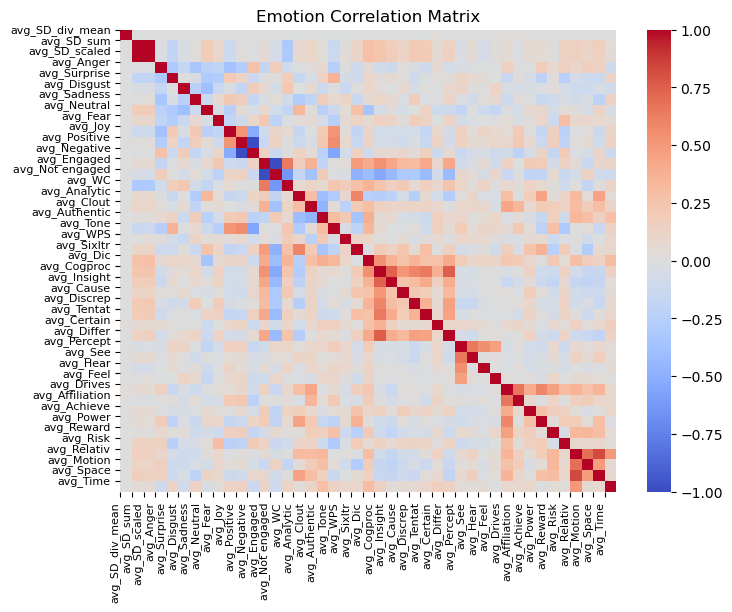

In [138]:
emotion_cols = [col for col in X.columns if 'avg_' in col]  # or manually select if you prefer
correlation_matrix = X[emotion_cols].corr()

plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm')
# Force ALL labels to show
ax.set_xticks([i for i in range(len(correlation_matrix.columns))])
ax.set_yticks([i for i in range(len(correlation_matrix.index))])
# Set labels explicitly
ax.set_xticklabels(correlation_matrix.columns, rotation=90, ha="right", fontsize=8)
ax.set_yticklabels(correlation_matrix.index, fontsize=8)
plt.title("Emotion Correlation Matrix")
plt.show()

In [170]:
# Assuming correlation_matrix is your DataFrame of correlations (from X.corr())
corr_pairs = correlation_matrix.unstack()

# Remove self-correlations (correlation of a variable with itself)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
# Sort by absolute correlation, descending
corr_pairs_sorted = corr_pairs.abs().sort_values(ascending=False)

# Show the top pairs
print(corr_pairs_sorted.head(20))

avg_Not engaged  avg_Engaged        1.000000
avg_Engaged      avg_Not engaged    1.000000
avg_Positive     avg_Negative       1.000000
avg_Negative     avg_Positive       1.000000
avg_SD_sum       avg_SD_scaled      0.998585
avg_SD_scaled    avg_SD_sum         0.998585
avg_Space        avg_Relativ        0.828762
avg_Relativ      avg_Space          0.828762
avg_Cogproc      avg_Differ         0.751005
avg_Differ       avg_Cogproc        0.751005
avg_Cogproc      avg_Insight        0.741857
avg_Insight      avg_Cogproc        0.741857
avg_Relativ      avg_Motion         0.694342
avg_Motion       avg_Relativ        0.694342
avg_Affiliation  avg_Drives         0.661123
avg_Drives       avg_Affiliation    0.661123
avg_See          avg_Percept        0.652443
avg_Percept      avg_See            0.652443
avg_Tentat       avg_Cogproc        0.645506
avg_Cogproc      avg_Tentat         0.645506
dtype: float64


**Insights:**
From the VIF (Variance Inflation Factor) analysis and the correlation heatmap, we see that some emotion vars are highly correlated:
- Avg Positive and Avg Negative are opposites (add up to one)
- Avg Engaged and Avg Not Engaged are opposites (add up to one)
- Avg Sum and Avg Scaled are highly correlated
  Avg Space and Avg Relativ are highly correlated

In [147]:
# Drop highly correlated variables
X.drop(['avg_Not engaged', 'avg_Negative', 'avg_SD_sum', 'avg_Neutral', 'avg_Relativ'], axis=1, inplace=True)

## Tree-Based Model: Random Forest

In [194]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

Genre_Sitcom     0.108783
avg_WC           0.091629
Network_CBS      0.083349
Season           0.066352
day_of_week      0.050965
Network_Fox      0.049532
Network_ABC      0.048136
Network_NBC      0.040492
emission_time    0.037252
avg_Neutral      0.021812
dtype: float64


In [204]:
print(importances.head(20))

Genre_Sitcom           0.108783
avg_WC                 0.091629
Network_CBS            0.083349
Season                 0.066352
day_of_week            0.050965
Network_Fox            0.049532
Network_ABC            0.048136
Network_NBC            0.040492
emission_time          0.037252
avg_Neutral            0.021812
Episode Length         0.021500
Genre_Medical drama    0.020807
avg_Certain            0.017970
Genre_Legal drama      0.015525
avg_WPS                0.015362
avg_Affiliation        0.013538
avg_Anger              0.013269
avg_Differ             0.013082
avg_Sixltr             0.012981
avg_Drives             0.012275
dtype: float64


In [198]:
# Make predictions
y_pred = rf.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")

MAE: 0.74
RMSE: 1.22
R² Score: 0.976


C:\Users\mermo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [268]:
# Predict viewership for first episode of every show
first_episodes_df = model_data.sort_values(by=['Show', 'Season', 'Episode']).groupby('Show').first().reset_index()
print(first_episodes_df.shape)
first_episodes_df.head()

(219, 72)


,Show,Season,Episode,emission_time,Episode Length,Viewership (millions),Network_ABC,Network_CBS,Network_FX,Network_Fox,Network_HBO,Network_NBC,Network_Showtime,avg_SD_div_mean,avg_SD_sum,avg_SD_scaled,avg_Anger,avg_Surprise,avg_Disgust,avg_Sadness,avg_Neutral,avg_Fear,avg_Joy,avg_Positive,avg_Negative,avg_Engaged,avg_Not engaged,avg_WC,avg_Analytic,avg_Clout,avg_Authentic,avg_Tone,avg_WPS,avg_Sixltr,avg_Dic,avg_Cogproc,avg_Insight,avg_Cause,avg_Discrep,avg_Tentat,avg_Certain,avg_Differ,avg_Percept,avg_See,avg_Hear,avg_Feel,avg_Drives,avg_Affiliation,avg_Achieve,avg_Power,avg_Reward,avg_Risk,avg_Relativ,avg_Motion,avg_Space,avg_Time,is_season_premiere,is_season_finale,day_of_week,Genre_Animated sitcom,Genre_Comedy,Genre_Comedy-Drama,Genre_Crime,Genre_Crime drama,Genre_Drama,Genre_Fantasy,Genre_Legal drama,Genre_Medical drama,Genre_Other,Genre_Police procedural,Genre_Serial drama,Genre_Sitcom
0,2 Broke Girls,1,1,21.0,22,19.37,0,1,0,0,0,0,0,6893.333312,20.302666,651.359304,0.150612,0.208265,0.221308,0.122320,0.205504,0.072316,0.019675,0.268770,0.731230,0.651345,0.348655,118.357143,20.193393,70.390536,50.109286,44.191667,5.982440,11.116964,89.871845,11.931548,2.567738,1.528631,2.029940,1.564583,1.278155,3.570179,3.210357,1.070595,0.834048,1.205119,7.328988,3.162202,0.982143,1.616667,1.826726,0.492738,11.193393,2.076071,6.000298,3.300357,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,24,1,1,21.0,42,11.64,0,0,0,1,0,0,0,5616.159671,21.684606,694.695094,0.147031,0.128508,0.104603,0.082275,0.396799,0.073696,0.067088,0.432024,0.567976,0.672231,0.327769,83.547619,25.186429,75.630000,54.178571,69.365238,5.771190,10.410000,87.970476,10.896667,2.229762,1.721190,2.153095,2.579524,1.398333,2.759048,2.651429,0.983571,1.194524,0.306667,8.970476,2.909762,0.839286,2.682619,2.715476,0.404286,12.730000,2.084048,6.570238,4.394286,1,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0
2,30 Rock,1,1,20.5,22,8.13,0,0,0,0,0,1,0,3925.064766,20.036158,643.881424,0.129599,0.167044,0.323155,0.048143,0.234636,0.038223,0.059200,0.294851,0.705149,0.701735,0.298265,144.744048,25.742560,74.430238,37.046250,68.784524,6.158810,9.848571,86.905655,9.356667,2.181131,1.304107,1.576012,1.413155,1.309048,2.355179,3.209524,1.646786,0.724881,0.781845,7.934643,2.472560,0.985952,2.222857,2.371310,0.419286,10.220238,1.574226,5.020476,3.733155,1,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3rd Rock from the Sun,1,1,20.5,22,23.00,0,0,0,0,0,1,0,17515.079572,20.658651,664.549954,0.297811,0.107561,0.143331,0.089693,0.293805,0.048206,0.019594,0.431185,0.568815,0.646044,0.353956,117.011905,25.628155,68.330060,61.965476,64.994345,5.827619,13.585833,88.169167,10.514702,2.767143,1.182679,1.071190,1.969762,1.447381,2.561548,2.758393,1.232321,0.401012,0.871250,7.347917,2.726012,0.710655,2.322857,1.403810,0.511131,12.126012,2.130714,6.939048,3.307262,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9-1-1: Lone Star,1,1,20.5,42,11.41,0,0,0,1,0,0,0,7501.728304,22.553129,726.009005,0.176501,0.118143,0.166276,0.109617,0.225961,0.140235,0.063267,0.434325,0.565675,0.701407,0.298593,112.750000,33.431667,80.916667,51.572083,53.187917,8.496250,9.900000,88.550625,9.826458,1.775625,1.251667,1.479583,1.781042,1.669375,2.686667,2.062292,1.029375,0.693750,0.339792,8.348333,3.073958,1.046667,2.451667,2.157500,0.308542,14.517083,3.310000,7.240208,4.354375,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0


In [274]:
# Encode categorical column
first_episodes_X = first_episodes_df.drop(columns=['Viewership (millions)', 'Show'])  # Features
first_episodes_df['Viewership Prediction'] = rf.predict(first_episodes_X)

In [276]:
first_episodes_df[['Show', 'Viewership (millions)', 'Viewership Prediction']]

,Show,Viewership (millions),Viewership Prediction
0,2 Broke Girls,19.370,16.84120
1,24,11.640,10.91740
2,30 Rock,8.130,8.49280
3,3rd Rock from the Sun,23.000,20.63880
4,9-1-1: Lone Star,11.410,10.94930
5,A Different World,34.300,30.25090
6,A Million Little Things,5.070,6.04760
7,Abbott Elementary,2.880,3.03810
8,Adventure Time,2.500,2.33020
9,Ally McBeal,9.900,10.44450


# XGBoost

In [220]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = model_data.drop(columns=['Viewership (millions)'])  # Features
y = model_data['Viewership (millions)']  # Target variable

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
# Convert data into DMatrix format (XGBoost requirement)
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
xgb = XGBRegressor(
    n_estimators=500,  # More trees (boosting rounds)
    max_depth=10,      # Deeper trees like RF
    learning_rate=0.05, # Slower learning for better performance
    subsample=0.8,      # Randomly sample 80% of data per tree
    colsample_bytree=0.8, # Randomly sample 80% of features per tree
    random_state=42
)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [226]:
# Make predictions
y_pred = xgb.predict(X_test)

# Compute performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 2.9797
R² Score: 0.8577


C:\Users\mermo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Research Question: Does sentiment variability between episodes impact audience retention?

In [249]:
new_data.sort_values(by='vw_pct_change', ascending = False).head(10)

,Show,Season,Episode,emission_time,Episode Length,IMDB Rating,Emmy Nominations,Emmy Wins,Air Date,SD_div_mean_2,...,avg_Time,month,year,year_month,day_of_week,season,year_season,vw_diff,vw_pct_change,moving_avg_vw
17966,Rick and Morty,3,2,11:00 PM,22,NaN,NaN,NaN,2017-07-30,16709.403380,...,3.329167,7,2017,2017-07,Sunday,3,2017_03,2.180,320.588235,1.770000
1536,Barry,2,3,10:00 PM,33,NaN,NaN,NaN,2019-04-14,4545.223415,...,2.801333,4,2019,2019-04,Sunday,2,2019_02,1.356,319.811321,0.912000
1783,Better Things,4,3,10:00 PM,22,NaN,NaN,NaN,2020-03-12,6480.745403,...,3.778704,3,2020,2020-03,Thursday,2,2020_02,0.333,204.294479,0.320333
519,3rd Rock from the Sun,3,14,9:00 PM,22,NaN,NaN,NaN,1998-01-25,3784.822150,...,3.999048,1,1998,1998-01,Sunday,1,1998_01,22.450,200.267618,19.073333
9483,Girls,3,6,10:00 PM,28,NaN,NaN,NaN,2014-02-09,8763.509573,...,3.676889,2,2014,2014-02,Sunday,1,2014_01,0.555,199.640288,0.588667
23816,This Is Us,2,14,9:00 PM,42,NaN,NaN,NaN,2018-02-04,4486.167636,...,4.476556,2,2018,2018-02,Sunday,1,2018_01,17.600,187.833511,15.386667
9688,Gravity Falls,2,6,9:00 PM,22,NaN,NaN,NaN,2014-10-04,8776.750441,...,4.010774,10,2014,2014-10,Saturday,4,2014_04,1.470,175.000000,1.340000
20669,The Blacklist,2,9,10:00 PM,42,NaN,NaN,NaN,2015-02-01,6190.057446,...,3.650571,2,2015,2015-02,Sunday,1,2015_01,15.970,163.794872,14.923333
22544,The Office,5,14,9:00 PM,22,NaN,NaN,NaN,2009-02-01,4288.434384,...,3.229940,2,2009,2009-02,Sunday,1,2009_01,14.150,161.529680,13.386667
13818,Mad About You,7,19,8:00 PM,22,NaN,NaN,NaN,1999-05-13,3442.047487,...,4.202857,5,1999,1999-05,Thursday,2,1999_02,11.890,158.533333,11.933333


In [312]:
# Define features (X) and target variable (y)
X = model_data.drop(columns=['vw_diff','vw_pct_change', 'Viewership (millions)'])  # Features
y = model_data['vw_pct_change']  # Target variable

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [314]:
# Convert data into DMatrix format (XGBoost requirement)
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    "objective": "reg:squarederror",  # Regression problem
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 5,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "n_estimators": 100
}

# Train model
xgb_regressor = xgb.train(params, train_data, num_boost_round=100)

C:\Users\mermo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


## Model Performance

In [317]:
# Make predictions
y_pred = xgb_regressor.predict(test_data)

# Compute performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 14.2357
R² Score: -0.0512


## Feature Importance

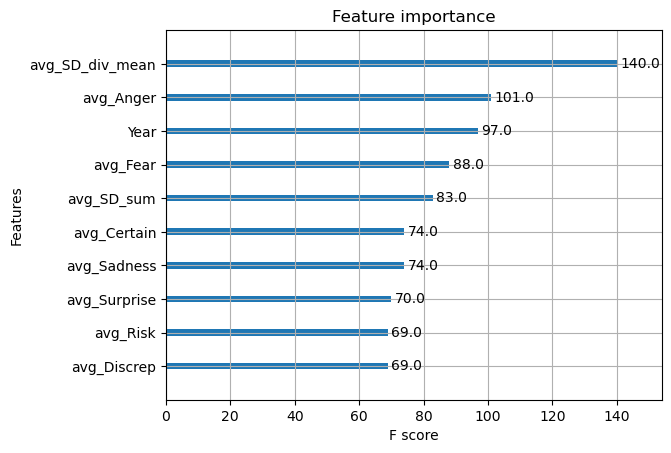

In [320]:
import matplotlib.pyplot as plt
import xgboost.plotting as xgb_plot

# Get feature importance
xgb.plot_importance(xgb_regressor, importance_type="weight", max_num_features=10)
plt.show()